In [10]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import numpy as np
import pandas as pd
from generate_verification_data import models

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2)
sns.set_palette("Dark2")

In [11]:
ttf_results = pd.read_parquet("verification/ttf.parquet")
ttf_results

,Model,Time-to-Feedback,TTF (Raw),Repetition,Execution time,Neuroticism
0,Low neuro,high,5.0,0,6.138038,low
1,Low neuro,high,5.0,1,8.173255,low
2,Low neuro,high,5.0,2,6.662627,low
3,Low neuro,high,5.0,3,3.920028,low
4,Low neuro,high,5.0,4,2.784780,low
...,...,...,...,...,...,...
7195,"ExGaussian fit,\nhigh neuro",medium,2.5,595,4.627890,high
7196,"ExGaussian fit,\nhigh neuro",medium,2.5,596,4.348078,high
7197,"ExGaussian fit,\nhigh neuro",medium,2.5,597,4.966646,high
7198,"ExGaussian fit,\nhigh neuro",medium,2.5,598,6.056449,high


In [12]:
duration_results = pd.read_parquet("verification/duration.parquet")
duration_results

,Configuration,Time-to-Feedback,TTF (Raw),Repetition,Step,Execution time
0,Low neuro,medium,2.5,0,1,3.254080
1,Low neuro,medium,2.5,0,2,3.538223
2,Low neuro,medium,2.5,0,3,8.585070
3,Low neuro,medium,2.5,0,4,4.516183
4,Low neuro,medium,2.5,0,5,4.596289
...,...,...,...,...,...,...
86395,"ExGaussian fit,\nhigh neuro",high,5.0,599,8,3.360915
86396,"ExGaussian fit,\nhigh neuro",high,5.0,599,9,4.093096
86397,"ExGaussian fit,\nhigh neuro",high,5.0,599,10,5.505328
86398,"ExGaussian fit,\nhigh neuro",high,5.0,599,11,16.837069


In [13]:
transition_results = pd.read_parquet("verification/transitions.parquet")
transition_results

,Model,Origin TTF,Destination TTF,Repetition,Execution time,Transition
0,Low neuro,low,medium,0,4.796311,Lower -> higher
1,Low neuro,low,medium,1,6.028927,Lower -> higher
2,Low neuro,low,medium,2,7.470195,Lower -> higher
3,Low neuro,low,medium,3,4.466069,Lower -> higher
4,Low neuro,low,medium,4,6.252382,Lower -> higher
...,...,...,...,...,...,...
21595,"ExGaussian fit,\nhigh neuro",high,high,595,3.337469,Same level
21596,"ExGaussian fit,\nhigh neuro",high,high,596,3.862939,Same level
21597,"ExGaussian fit,\nhigh neuro",high,high,597,11.990740,Same level
21598,"ExGaussian fit,\nhigh neuro",high,high,598,6.133709,Same level


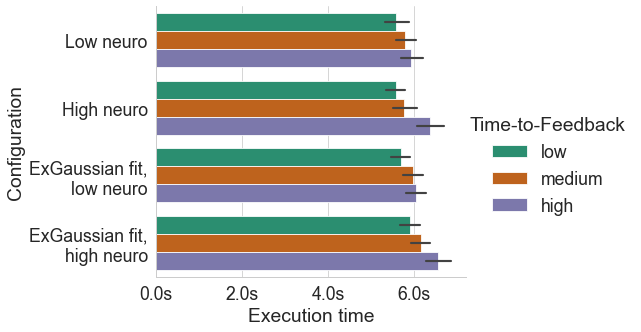

Time-to-Feedback
high      0.079328
low       0.018910
medium    0.014463
Name: Execution time, dtype: float64

In [14]:
fg = sns.catplot(
    kind="bar",
    # join=False,
    dodge=True,
    data=ttf_results,
    y="Model",
    order=models.keys(),
    x="Execution time",
    hue="Time-to-Feedback",
    hue_order=["low", "medium", "high"],
    aspect=1.5,
)
# fg.set(xlim=(None, 8))
# fg.set_axis_labels("Execution time [s]", "Configuration")
# fg.legend.set_title("Time-to-feedback")
fg.set_ylabels("Configuration")
for ax in fg.axes.flat:
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f"{y:2.1f}s"))
plt.show()

rmeans = (
    ttf_results.groupby(["Model", "Neuroticism", "Time-to-Feedback"])["Execution time"].mean()
)
(rmeans.loc[pd.IndexSlice[:, "high", :]].groupby("Time-to-Feedback").mean() - rmeans.loc[pd.IndexSlice[:, "low", :]].groupby("Time-to-Feedback").mean()) / rmeans.loc[pd.IndexSlice[:, "low", :]].groupby("Time-to-Feedback").mean()

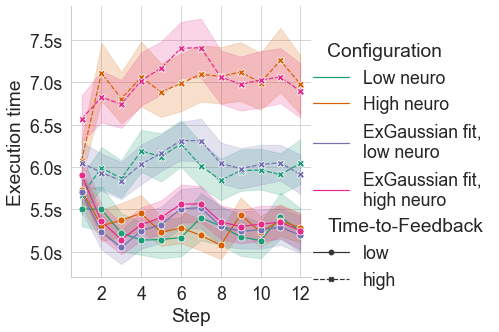

Configuration                Time-to-Feedback  Step
ExGaussian fit,\nhigh neuro  high              1       6.569532
                                               2       6.823753
                             low               1       5.907761
                                               2       5.357915
                             medium            1       6.171741
                                               2       5.903707
ExGaussian fit,\nlow neuro   high              1       6.051498
                                               2       5.934459
                             low               1       5.702931
                                               2       5.232635
                             medium            1       5.967503
                                               2       5.769362
High neuro                   high              1       6.075669
                                               2       7.112314
                             low               1    

In [15]:
fg = sns.relplot(
    kind="line",
    err_style="band",
    errorbar=("ci", 95),
    data=duration_results,
    x="Step",
    y="Execution time",
    hue="Configuration",
    hue_order=models.keys(),
    style="Time-to-Feedback",
    style_order=["low", "high"],
    markers=True,
    markersize=7,
)
for ax in fg.axes.flat:
    ax.xaxis.set_major_locator(tkr.MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f"{y:0.1f}s"))
fg.set_axis_labels("Step", "Execution time")
plt.show()

duration_results[np.isin(duration_results["Step"], (1, 2))].groupby(["Configuration", "Time-to-Feedback", "Step"])["Execution time"].mean()

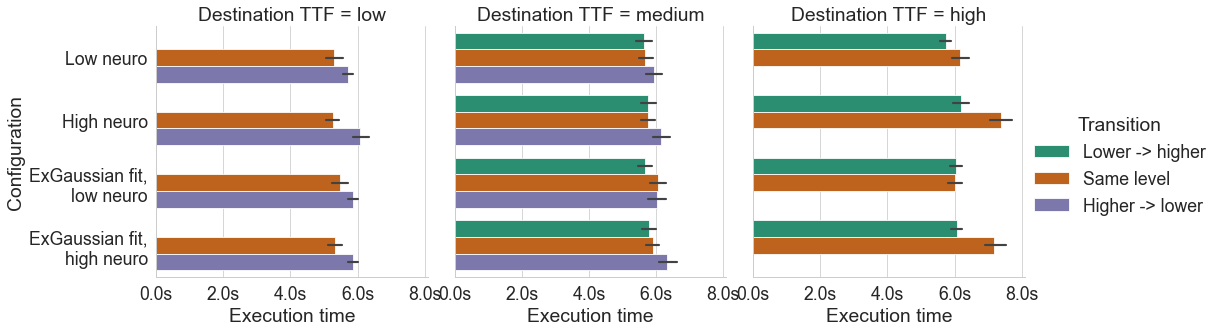

Destination TTF  Model                        Transition     
high             ExGaussian fit,\nhigh neuro  Lower -> higher    6.057567
                                              Same level         7.181135
                 ExGaussian fit,\nlow neuro   Lower -> higher    6.038590
                                              Same level         6.001143
                 High neuro                   Lower -> higher    6.195513
                                              Same level         7.366431
                 Low neuro                    Lower -> higher    5.735390
                                              Same level         6.174673
low              ExGaussian fit,\nhigh neuro  Higher -> lower    5.853367
                                              Same level         5.319104
                 ExGaussian fit,\nlow neuro   Higher -> lower    5.862348
                                              Same level         5.475826
                 High neuro                   High

In [16]:
fg = sns.catplot(
    kind="bar",
    data=transition_results,
    y="Model",
    x="Execution time",
    hue="Transition",
    hue_order=["Lower -> higher", "Same level", "Higher -> lower"],
    col="Destination TTF",
    col_order=["low", "medium", "high"],
    # dodge=False,
    # aspect=1.5,
)
fg.set_ylabels("Configuration")
for ax in fg.axes.flat:
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f"{y:2.1f}s"))
plt.show()

transition_results.groupby(["Destination TTF", "Model", "Transition"], observed=True)["Execution time"].mean()